<h1><font color="Deep Blue" size="10"><center>Capstone Project -2</center></font></h1>
<h2><center>Project Name:- Flight Satisfaction Prediction: Enhancing Passenger Experiences</center></h2>
<center> Classification  </center>


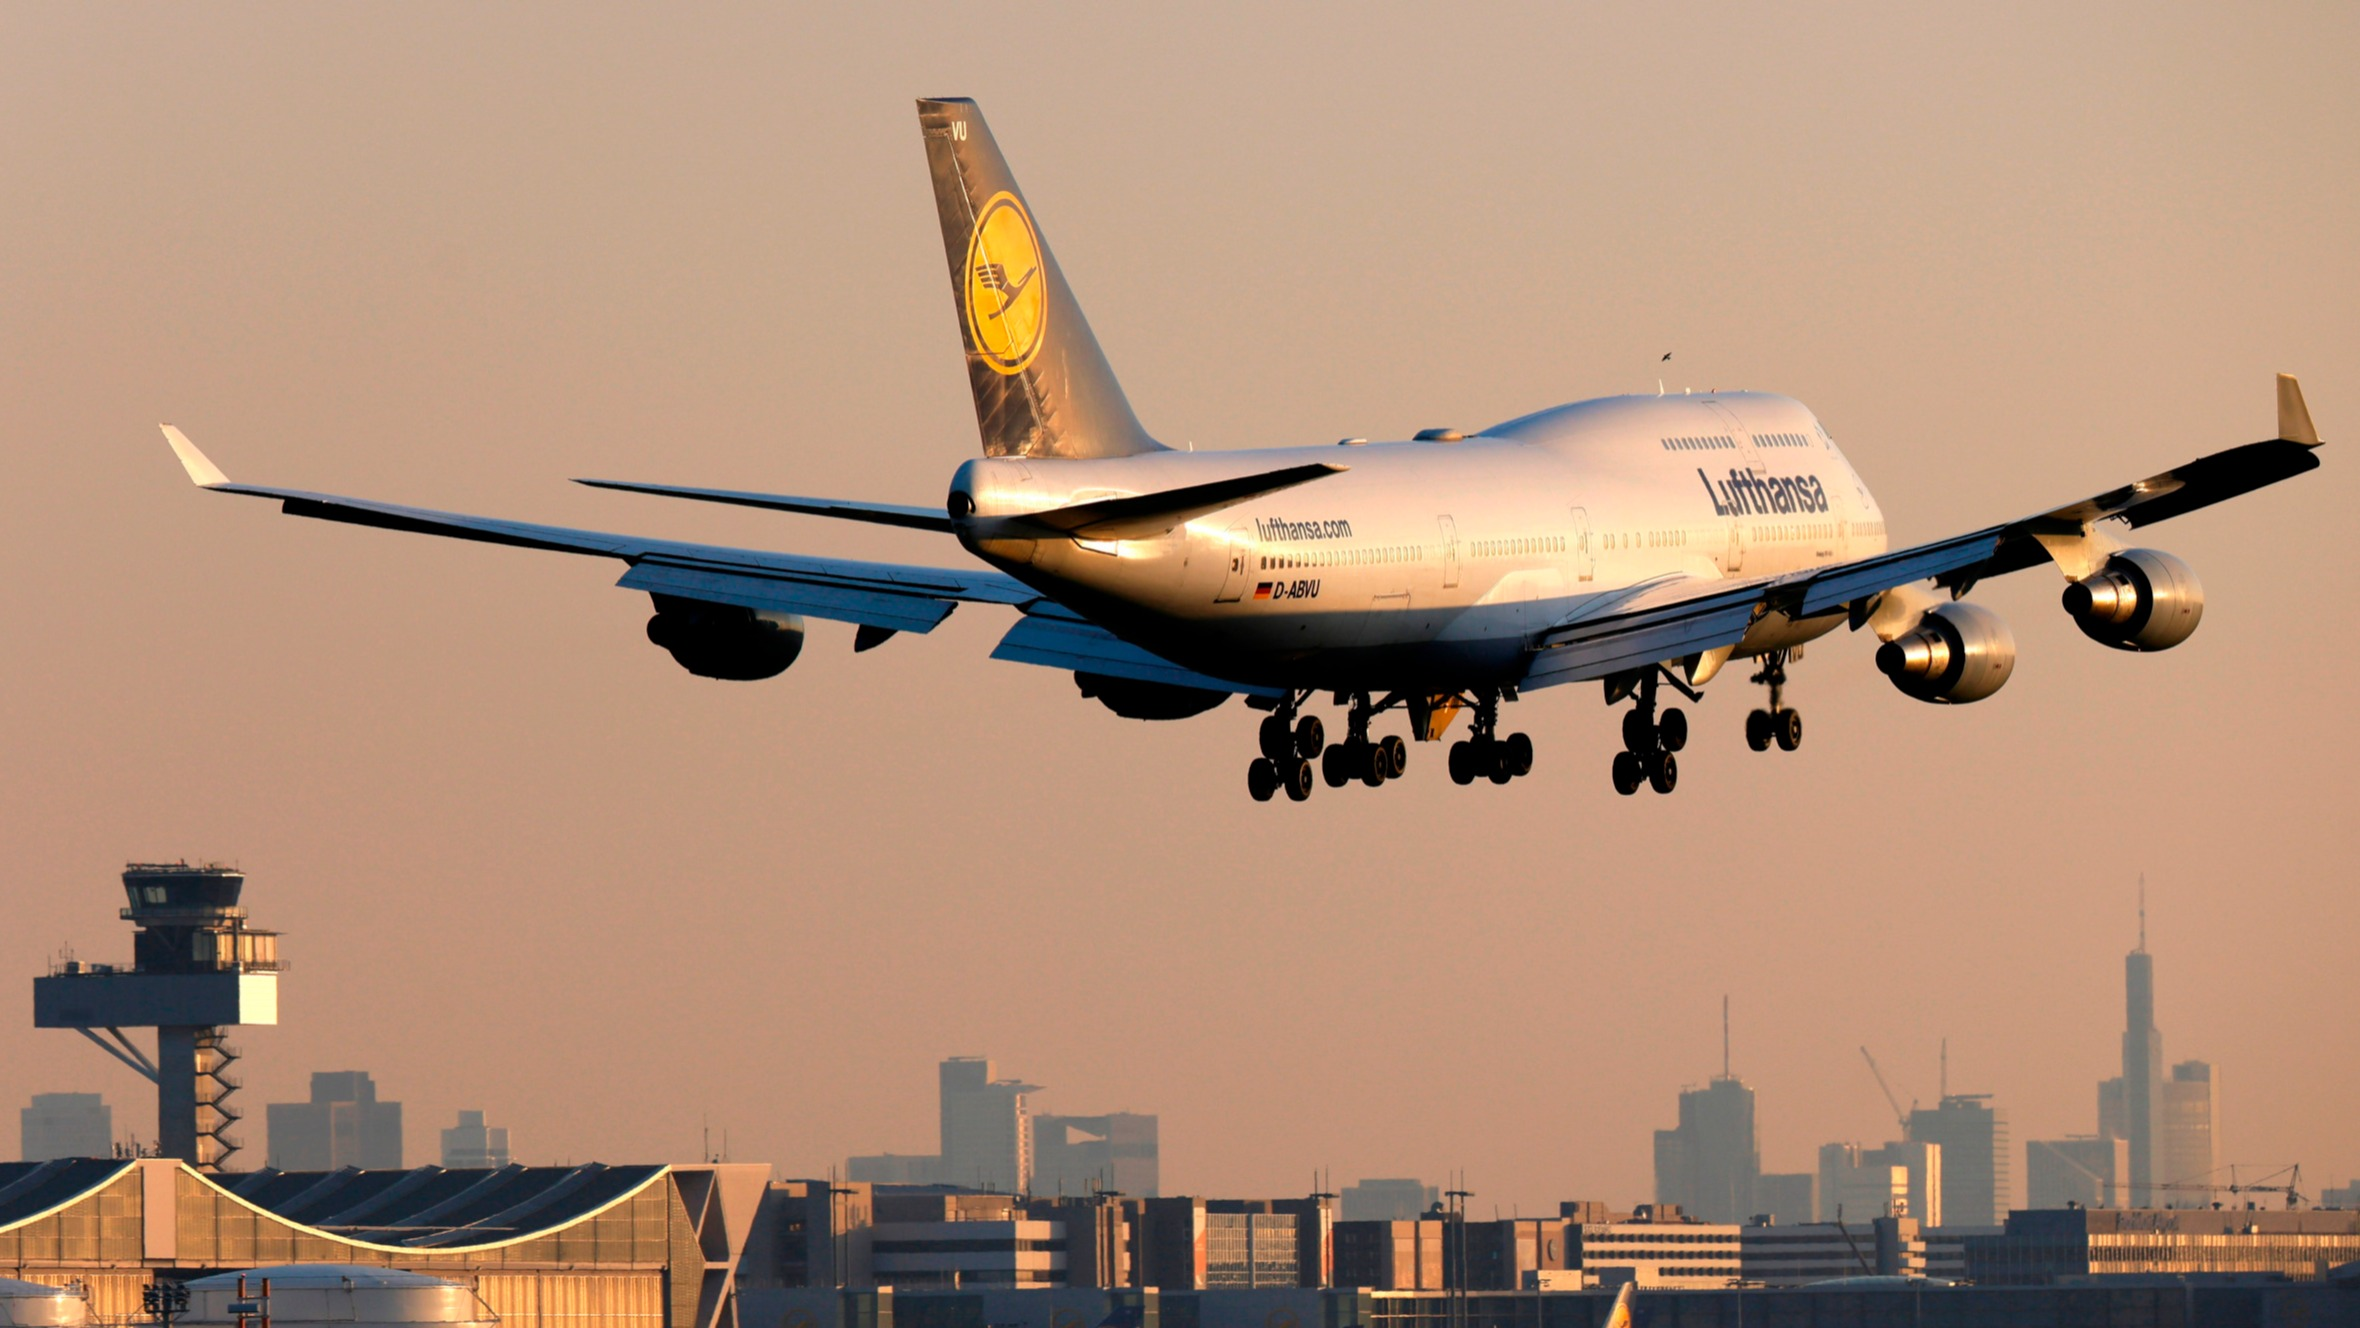

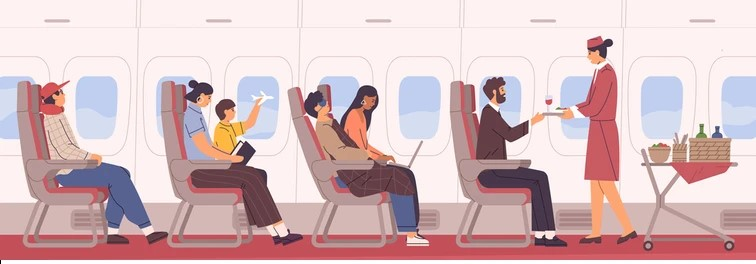

# <font color = "blue" size = 6> **Background:-** </font>

 * The aviation industry is highly competitive and rapidly evolving, driven by factors like globalization, rising incomes, and technological advancements. Airlines face the challenge of managing growing passenger numbers while maintaining high service standards.

* Customer satisfaction is crucial for airlines to stand out in the market. Satisfied customers are more likely to stay loyal and recommend the airline to others. Understanding what drives passenger satisfaction is essential for airlines to improve services and retain customers.

* Technology plays a key role in enhancing customer experiences, from booking to post-flight services. Airlines collect vast amounts of data on customer demographics, travel patterns, and service ratings to gain insights into passenger preferences and behaviors.

Predictive modeling using machine learning helps airlines anticipate customer satisfaction levels by analyzing historical data. This allows airlines to identify areas for improvement and tailor services to meet changing customer expectations.

# <font color = "brown" size = 7> **Problem Statement:-** </font>
In the aviation industry, ensuring customer satisfaction is paramount for maintaining competitiveness and fostering brand loyalty. Understanding passenger sentiments and factors influencing their satisfaction levels can significantly impact operational strategies and customer experience enhancements.

Given a dataset containing various attributes related to passengers' flight experiences, including demographic information, travel preferences, service ratings, and flight details, the objective is to predict whether a customer is satisfied or not based on their journey.


<font color = "brown" size = 5> **Data Dictionary:-** </font>


>**Gender**: Gender of the passengers (Female, Male)

>**Customer Type**: The customer type (Loyal customer, disloyal customer)

>**Age**: The actual age of the passengers

>**Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

>**Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

>**Flight distance**: The flight distance of this journey

>**Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

>**Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

>**Ease of Online booking**: Satisfaction level of online booking

>**Gate location**: Satisfaction level of Gate location

>**Food and drink**: Satisfaction level of Food and drink

>**Online boarding**: Satisfaction level of online boarding

>**Seat comfort**: Satisfaction level of Seat comfort

>**Inflight entertainment**: Satisfaction level of inflight entertainment

>**On-board service**: Satisfaction level of On-board service

>**Leg room service**: Satisfaction level of Leg room service

>**Baggage handling**: Satisfaction level of baggage handling

>**Check-in service**: Satisfaction level of Check-in service

>**Inflight service**: Satisfaction level of inflight service

>**Cleanliness**: Satisfaction level of Cleanliness

>**Departure Delay in Minutes**: Minutes delayed when departure

>**Arrival Delay in Minutes**: Minutes delayed when Arrival

>**Satisfaction**: Airline satisfaction level(Satisfaction and dissatisfaction)

In [5]:
# Importing necessary libraries.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings to keep the output clean.
# for numerical operations.
import numpy as np
# for data manipulation and analysis.
import pandas as pd
# for plotting data and visualizations.
import matplotlib.pyplot as plt
# for statistical datavisualization.
import seaborn as sns
import plotly.express as px

In [6]:
acs = pd.read_csv(r"C:\Users\Dell\Downloads\Airline Customer Satisfaction.csv")
acs

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
129875   78463    Male  disloyal Customer   34  Business travel  Business   
129876   71167    Male     Loyal Customer   23  Business travel  Business   
129877   37675  Female     Loyal Customer   17  Personal Travel       Eco   
129878   90086    Male     Loyal Customer   14  Business travel  Business   
129879   34799  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2

<font color = "black" size = 3> **Checking the numbers of rows and columns** </font>

In [7]:
acs.shape

(129880, 24)


<font color = "black" size = 3> **Lets have a look at column names** </font>

In [8]:
acs.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


<font color = "black" size = 3> **Column name has some spaces so lets fix them** </font>

In [10]:
acs.columns= [col.replace(' ','_') for col in acs.columns]

<font color = "black" size = 3> **Lets check the null values** </font>

In [11]:
acs.isnull().sum()[acs.isnull().sum() > 0 ] # checking the null values

Arrival_Delay_in_Minutes    393
dtype: int64

# <font color = "Black" size = 3> **Observation :** </font>
Since the missing values are very few compared to the total entries, we will replace them with median.

In [12]:
percentage_null = acs['Arrival_Delay_in_Minutes'].isnull().sum() / len(acs['Arrival_Delay_in_Minutes']) * 100
print("Percentage of null values in Arrival_Delay_in_Minutes column:", percentage_null)


Percentage of null values in Arrival_Delay_in_Minutes column: 0.3025870033877425


There is 0.30 percentage Null value  in Arrival_Delay_in_Minutes  column so we will fill this  missing value by the median

In [13]:
acs['Arrival_Delay_in_Minutes'] = acs['Arrival_Delay_in_Minutes'].fillna(acs['Arrival_Delay_in_Minutes'].median()) 

Since the missing values are very few compared to the total entries, we will replace them with mediam.

In [14]:
acs.isnull().sum()[acs.isnull().sum() > 0 ] # checking the null values

Series([], dtype: int64)

<font color = "black" size = 3>**Checking column type and missing values**</font>

In [15]:
#getting all the information of dataset using info command
#info command gives
  #1 No of rows
  #2 No of columns
  #3 No of float,int,object columns
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298


<font color = "black" size = 3> **Checking the unique values** </font>

In [16]:
acs.nunique()

id                                   129880
Gender                                    2
Customer_Type                             2
Age                                      75
Type_of_Travel                            2
Class                                     3
Flight_Distance                        3821
Inflight_wifi_service                     6
Departure/Arrival_time_convenient         6
Ease_of_Online_booking                    6
Gate_location                             6
Food_and_drink                            6
Online_boarding                           6
Seat_comfort                              6
Inflight_entertainment                    6
On-board_service                          6
Leg_room_service                          6
Baggage_handling                          5
Checkin_service                           6
Inflight_service                          6
Cleanliness                               6
Departure_Delay_in_Minutes              466
Arrival_Delay_in_Minutes        

<font color = "Black" size = 3> **Statistical Summary** </font>

In [181]:
acs.describe()  # Numerical column

id            Age  Flight_Distance  Inflight_wifi_service  \
count  129880.000000  129880.000000    129880.000000          129880.000000   
mean    64940.500000      39.427957      1190.316392               2.728696   
std     37493.270818      15.119360       997.452477               1.329340   
min         1.000000       7.000000        31.000000               0.000000   
25%     32470.750000      27.000000       414.000000               2.000000   
50%     64940.500000      40.000000       844.000000               3.000000   
75%     97410.250000      51.000000      1744.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival_time_convenient  Ease_of_Online_booking  \
count                      129880.000000           129880.000000   
mean                            3.057599                2.756876   
std                             1.526741                1.401740   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate_location  Food_and_drink  Online_boarding   Seat_comfort  \
count  129880.000000   129880.000000    129880.000000  129880.000000   
mean        2.976925        3.204774         3.252633       3.441361   
std         1.278520        1.329933         1.350719       1.319289   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight_entertainment  On-board_service  Leg_room_service  \
count           129880.000000     129880.000000     129880.000000   
mean                 3.358077          3.383023          3.350878   
std                  1.334049          1.287099          1.316252   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage_handling  Checkin_service  Inflight_service    Cleanliness  \
count     129880.000000    129880.000000     129880.000000  129880.000000   
mean           3.632114         3.306267          3.642193       3.286326   
std            1.180025         1.266185          1.176669       1.313682   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes   Total Points  
count               129880.000000             129880.000000  129880.000000  
mean                    14.713713                 15.045465    3256.896782  
std                     38.071126                 38.416353    3484.643269  
min                      0.000000                  0.000000       0.000000  
25%                      0.000000                  0.000000     911.000000  
50%                      0.000000                  0.000000    1994.000000  
75%                     12.000000                 13.000000    4260.000000  
max                   1592.000000               1584.000000   24915.000000

In [15]:
acs.describe(include ='object')

Gender   Customer_Type   Type_of_Travel     Class  satisfaction
count   129880          129880           129880    129880        129880
unique       2               2                2         3             2
top     Female  Loyal Customer  Business travel  Business  dissatisfied
freq     65899          106100            89693     62160         73452

<font color = "blue" size = 5> **Data Distribution** </font>

In [16]:
numeric_acs=acs._get_numeric_data()

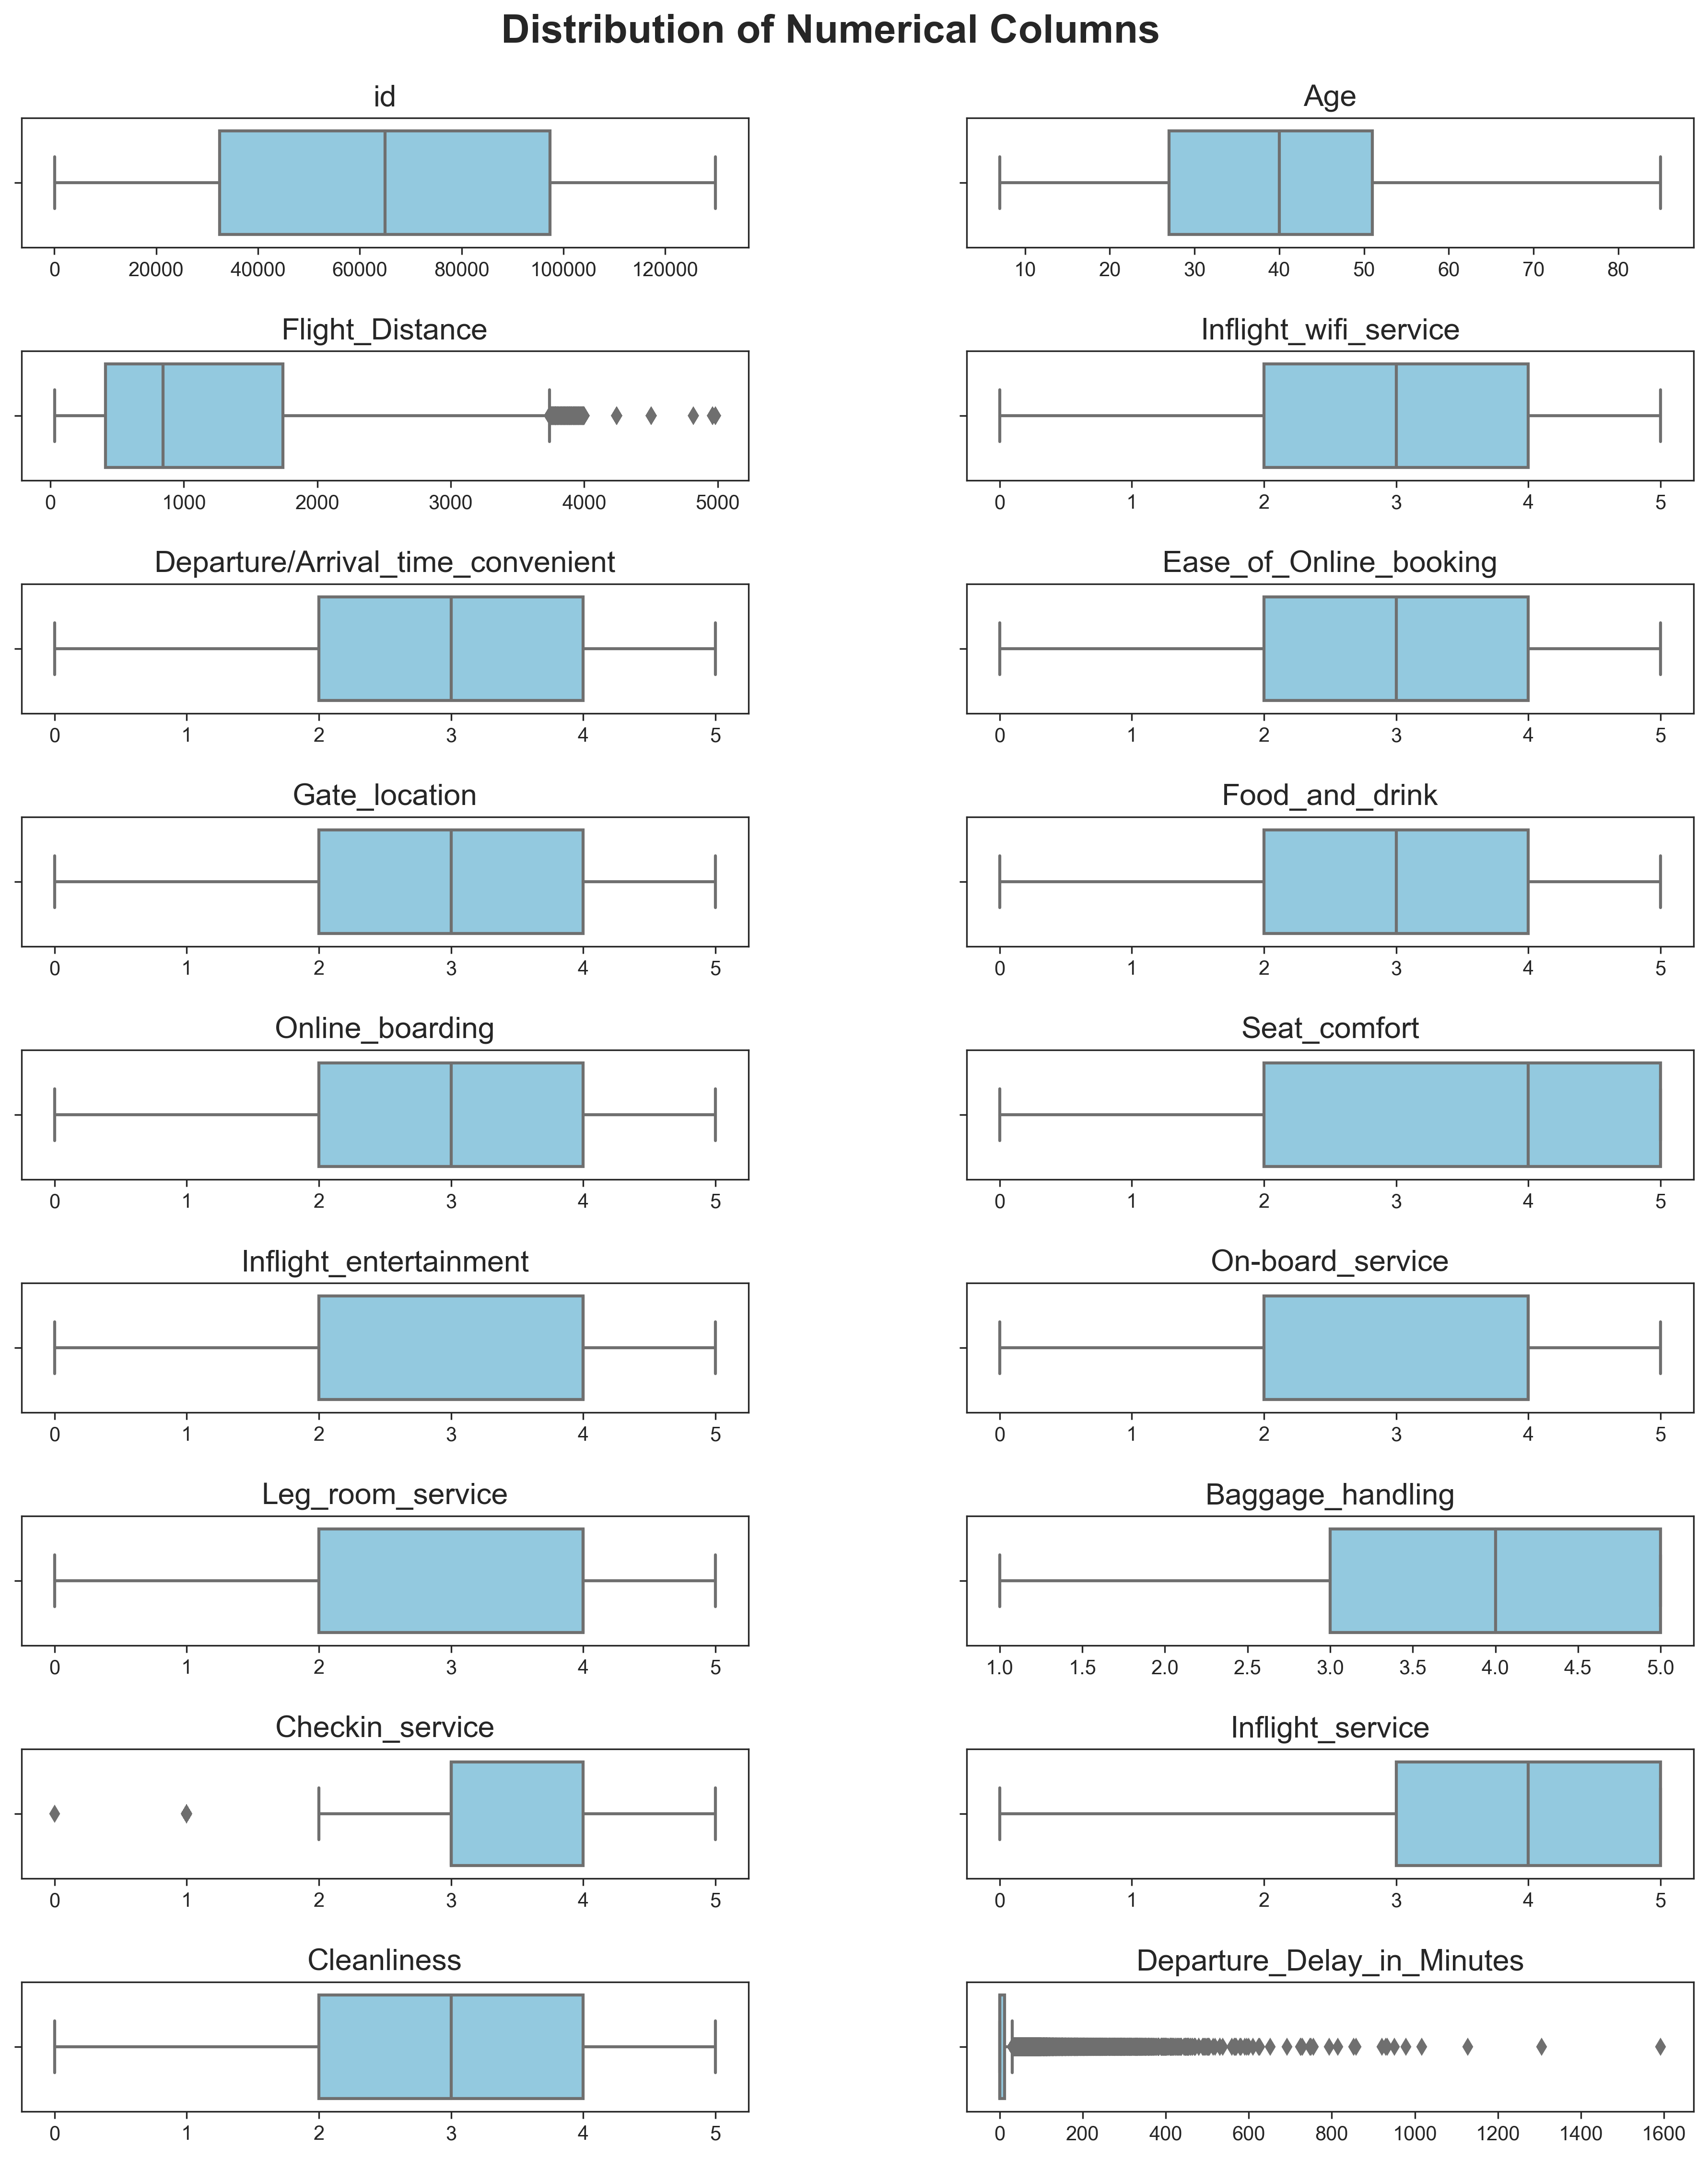

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `numeric_df` contains your numerical columns
# If not, replace `numeric_df` with your actual DataFrame containing numerical columns

# Set Seaborn style
sns.set_style('ticks')

# Create a new figure
fig, axes = plt.subplots(9, 2, figsize=(15, 18), dpi=300)

# Iterate through each numerical column
for ax, column_name in zip(axes.flatten(), numeric_acs.columns):
    sns.boxplot(x=column_name, data=numeric_acs, ax=ax, color='skyblue')
    ax.set_title(column_name, size=15)
    ax.set_xlabel('')

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.8, wspace=0.3)

# Set title for the entire figure
fig.suptitle("Distribution of Numerical Columns", size=20, fontweight='bold', y=0.92)

# Show the plot
plt.show()


<font color = "Black" size = 3> **Observation :** </font>

• There aren't any negative numbers.

• All the reviews are from 0 to 5 (which is not currect correct).because all most of the comapanis review range between 1 to 5 so we will fix it

• The age , departure delay,arrival delay and flight distance values are logical.

<font color = "Blue" size = 5> **Gender** </font>

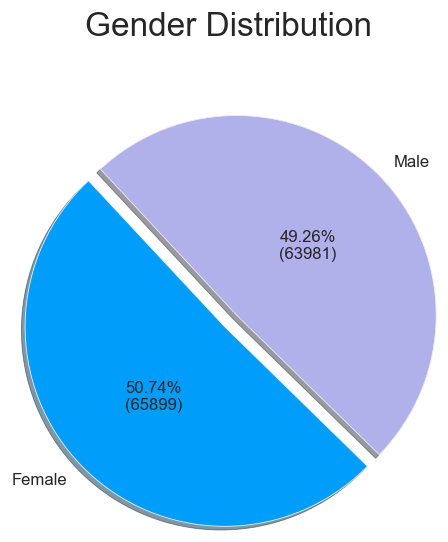

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=120)
plt.style.use('bmh')
plt.title('Gender Distribution', size=20, y=1.5, x=0.5)

explode = (0.05, 0.1)
gender_counts = acs['Gender'].value_counts()

# Define a function to generate autopct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct, v=val)
    return my_autopct

plt.pie(gender_counts, labels=gender_counts.index, shadow=True, colors=['#009EFA', '#B0B0EB'],
        autopct=make_autopct(gender_counts), pctdistance=0.5, radius=1.8, startangle=133, explode=explode)

plt.show()

# <font color = "Black" size = 3> **Observation :** </font>
 The number of females is slightly higher than the number of males.

<font color = "Blue" size = 5> **Age** </font>

<Axes: >

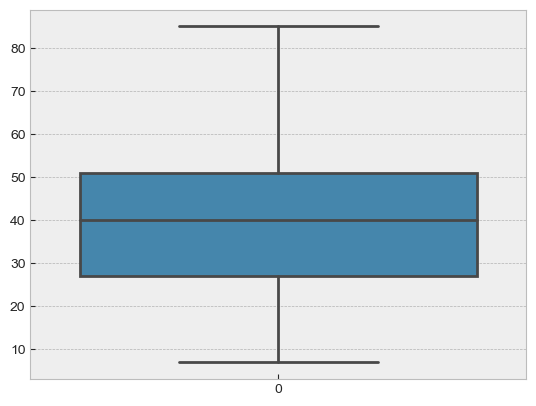

In [19]:
sns.boxplot(acs.Age)

## Observation : 
We can see that there are no anomalies in the Ages column (No negative ages or big integers)

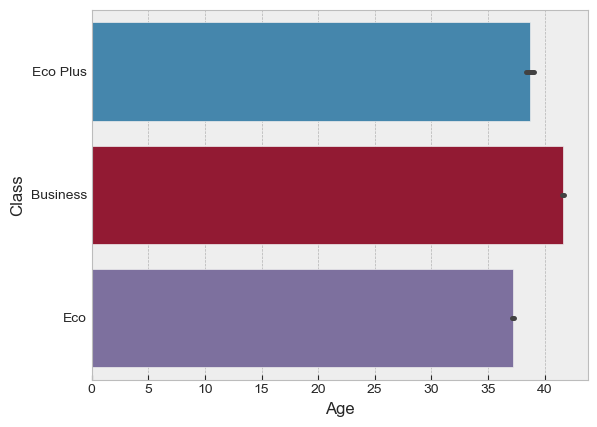

In [20]:
colors = sns.color_palette("husl")
sns.barplot(x='Age',y='Class',data=acs);

"The bar plot shows the average age of passengers in the three classes: Eco, Business, and Eco Plus, using HUSL colors."

<font color = "Blue" size = 5> **Customer Type** </font>

In [22]:
acs['Customer_Type'].value_counts() 

Loyal Customer       106100
disloyal Customer     23780
Name: Customer_Type, dtype: int64

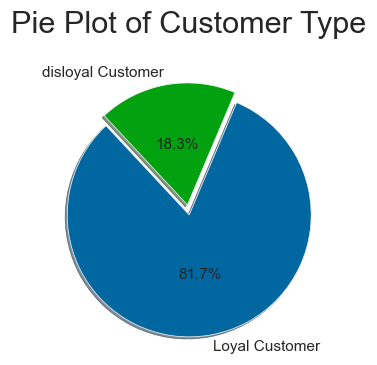

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2), dpi=110)
plt.style.use('bmh')
plt.title('Pie Plot of Customer Type', size=20, y=1.5, x=0.5)

explode = (0.05, 0.1)
customer_type_counts = acs['Customer_Type'].value_counts()

# Specify custom colors for the pie chart
colors = ['#0167A1', '#01A110']  # Add your desired colors here

plt.pie(customer_type_counts, labels=customer_type_counts.index, shadow=True, colors=colors,
        autopct='%1.1f%%', pctdistance=0.5, radius=1.8, startangle=133, explode=explode)

plt.show()

# <font color = "Black" size = 3> **Observation :** </font>

• We come to the conclusion that most of the airline customers are returning ones. Less than 20% are first time customers.

<font color = "Blue" size = 5> **Type of Travel** </font>

In [24]:
acs.Type_of_Travel.value_counts()

Business travel    89693
Personal Travel    40187
Name: Type_of_Travel, dtype: int64

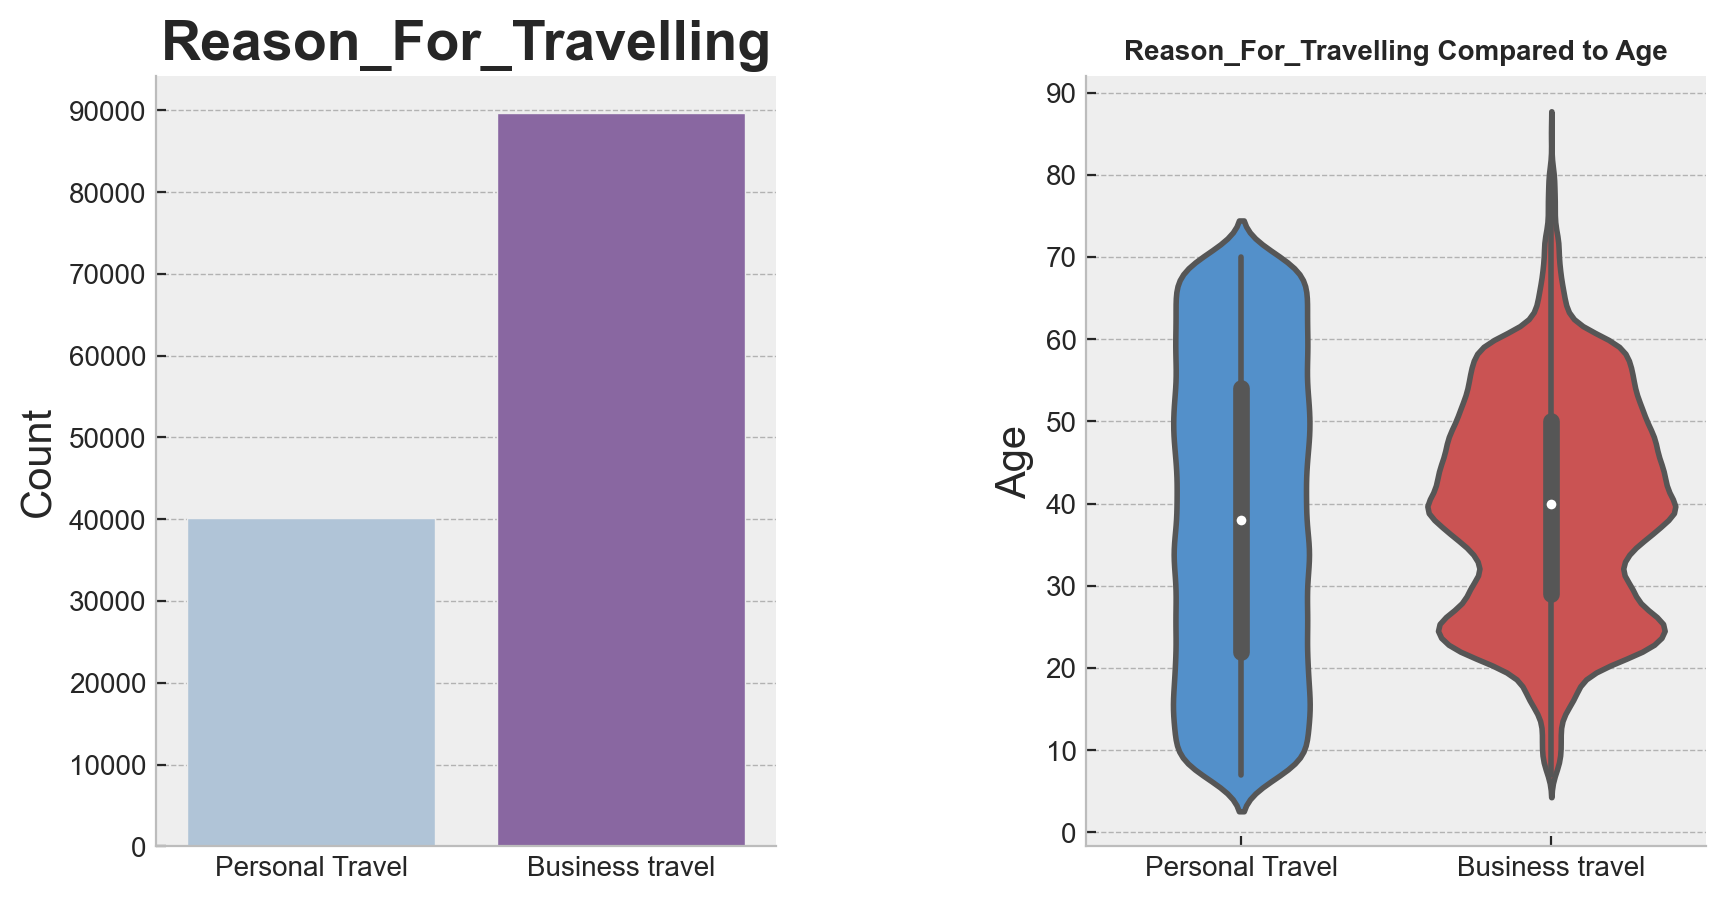

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5), dpi=200)

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(x='Type_of_Travel', data=acs, palette='BuPu')
plt.title('Reason_For_Travelling', size=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count', size=15)
plt.yticks(np.arange(0, 100000, 10000))
sns.despine()

# Second subplot
plt.subplot(1, 2, 2)
sns.violinplot(x='Type_of_Travel', y='Age', data=acs, palette=['#3F91DE', '#DE3F3F'])
plt.title('Reason_For_Travelling Compared to Age', size=10, fontweight='bold')
plt.ylabel('Age', size=15)
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('')
sns.despine()

plt.subplots_adjust(hspace=0.6, wspace=0.5)

plt.show()


# <font color = "Black" size = 3> **Observation :** </font>

• Passengers flying for business purposes are almost triple than those flying for personal.

• Number of passengers flying for personal reasons is consinstent at any age.

• Most passengers flying for business are between 25-60.

In [26]:
# Filter the DataFrame to include rows where 'satisfaction' column is 'satisfied'
temp_2 = acs[acs['satisfaction'] == 'satisfied']

# Group by 'Class' and 'Gender' and calculate the mean satisfaction
temp_2 = temp_2.groupby(['Class', 'Gender']).size().reset_index(name='Count')
temp_2['Average Satisfaction'] = 'Satisfied'

# Create a treemap visualization using Plotly Express
fig = px.treemap(temp_2, 
                 path=['Average Satisfaction', 'Class', 'Gender'],  # Define the hierarchical path
                 values='Count',  # Specify the values to be represented by the treemap areas
                 color='Count',  # Color by count
                 color_continuous_scale='RdBu',  # Choose a color scale for representing values
                 title="Airline Customer Satisfaction")

# Display the treemap
fig.show()

This treemap visualizes the count of satisfied airline customers by class and gender

<font color = "Blue" size = 5> **Class** </font>

In [28]:
acs.Class.value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

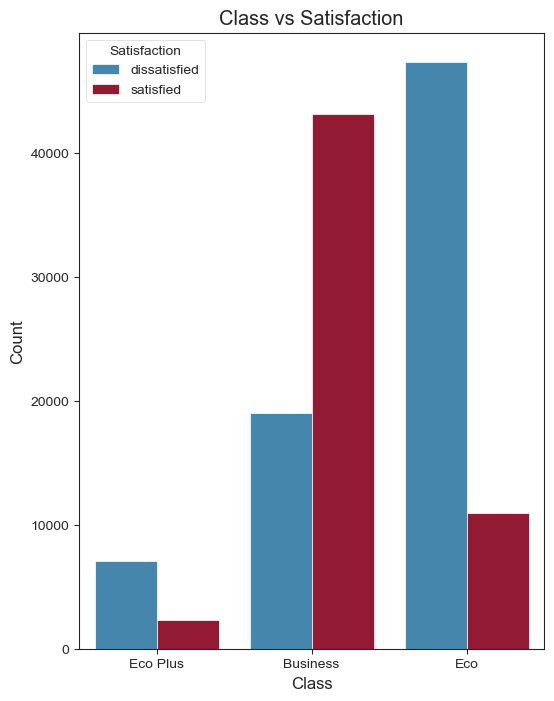

In [176]:
# Relationship between 'Class' and 'satisfaction'
plt.figure(figsize=(6, 8))
sns.countplot(x='Class', hue='satisfaction', data=acs)
plt.title('Class vs Satisfaction')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

# Feature Engineering (example: create a new feature 'Total Points')
acs['Total Points'] = acs[
    'Flight_Distance'] * acs['Inflight_wifi_service']


# <font color = "Black" size = 3> **Observation :** </font>

• Very few people fly in the economy plus class. They usually prefer Economy or Business.

• More than 80% of passengers flying in economy are either Neutral or Dissatisfied. That shows us that it needs some impromevent.


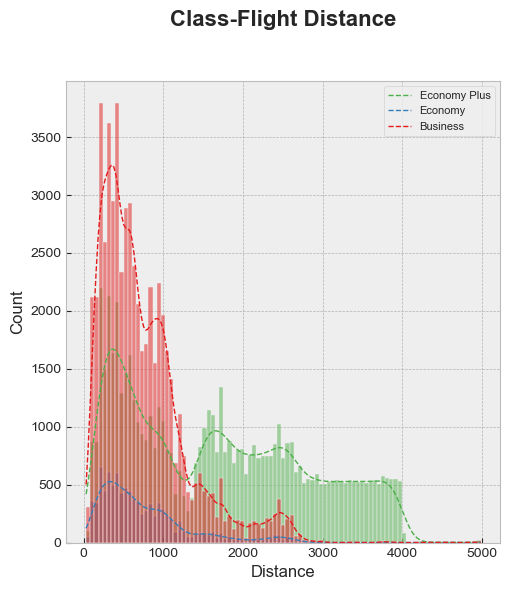

In [157]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Second subplot: Class-Flight Distance
plt.subplot(1, 2, 2)
sns.histplot(x='Flight_Distance', data=acs, hue='Class', palette='Set1', kde=True, line_kws={'lw': 1, 'ls': '--'}, pmax=.1)
plt.title('Class-Flight Distance', size=16, fontweight='bold', y=1.1)
plt.xlabel('Distance', size=12)
plt.ylabel('Count', size=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Economy Plus', 'Economy', 'Business'], fontsize=8)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5)

# Show the plot
plt.show()


# <font color = "Black" size = 3> **Observation :** </font>

• Passengers that fly for long distances almost always prefer business class. Probably because it is more comfortable.

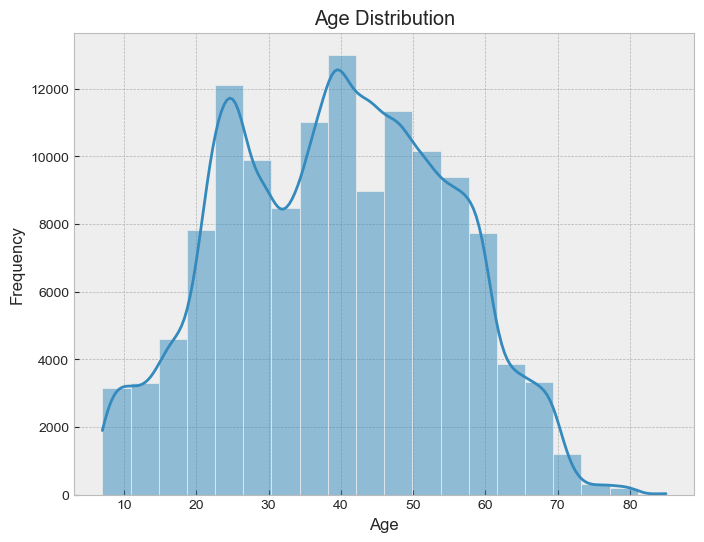

In [30]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(acs['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The people of age group from 20 to 50 are travelling frequently

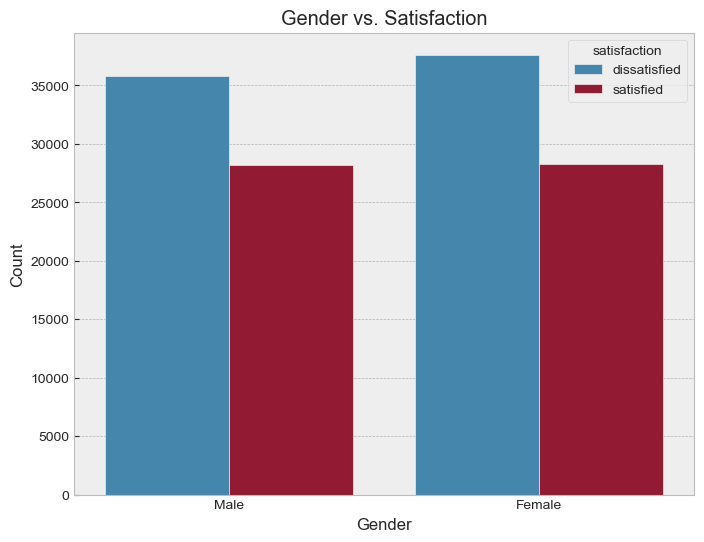

In [31]:
# Gender Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=acs, hue='satisfaction')
plt.title('Gender vs. Satisfaction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<font color = "Blue" size = 5> **Delays** </font>

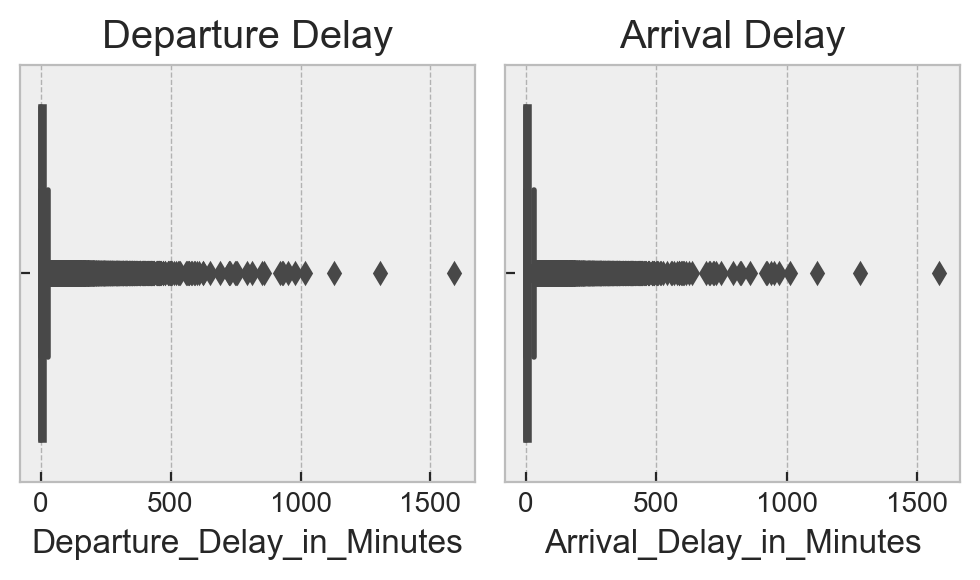

In [32]:
# Create a figure and set of subplots
plt.figure(figsize=(5, 3), dpi=200)

# Create the boxplot for Departure Delay
plt.subplot(1, 2, 1)
sns.boxplot(x='Departure_Delay_in_Minutes', data=acs)
plt.title('Departure Delay')

# Create the boxplot for Arrival Delay
plt.subplot(1, 2, 2)
sns.boxplot(x='Arrival_Delay_in_Minutes', data=acs)
plt.title('Arrival Delay')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [33]:
departure_delay_pct = round((acs['Departure_Delay_in_Minutes'] > 60).mean() * 100, 2)
arrival_delay_pct = round((acs['Arrival_Delay_in_Minutes'] > 60).mean() * 100, 2)

print('Delay over an hour long:')
print(f'Departure delay: {departure_delay_pct} %')
print(f'Arrival delay: {arrival_delay_pct} %')

Delay over an hour long:
Departure delay: 6.91 %
Arrival delay: 7.0 %


# <font color = "Black" size = 3> **Observation :** </font>

• We can see that delays over an hour are at a small percentage, which is a good thing.

Note:
• The 7% of arrival delays are also directly connected to the departure delays which means the percentages are not that accurate.

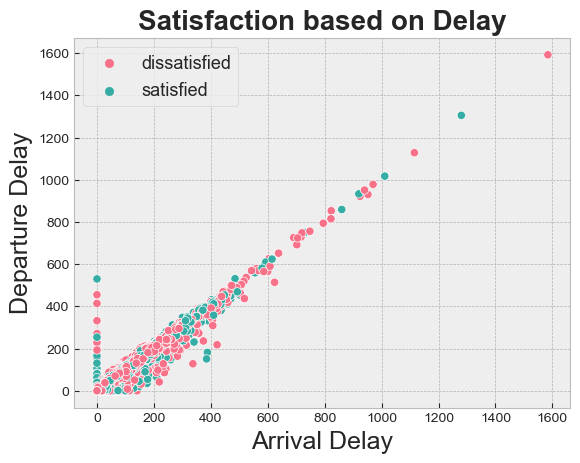

In [34]:
plt.title('Satisfaction based on Delay',size=20,fontweight='bold')

sns.scatterplot(y='Departure_Delay_in_Minutes',data=acs,x='Arrival_Delay_in_Minutes',hue='satisfaction',palette='husl')

plt.xlabel('Arrival Delay',size=18)
plt.ylabel('Departure Delay',size=18)

plt.legend(fontsize='13')
plt.show()

# <font color = "Black" size = 3> **Observation :** </font>

• The longer the delay is more people are Dissatisfied (or Neutral) and less are Satisfied, which is expected

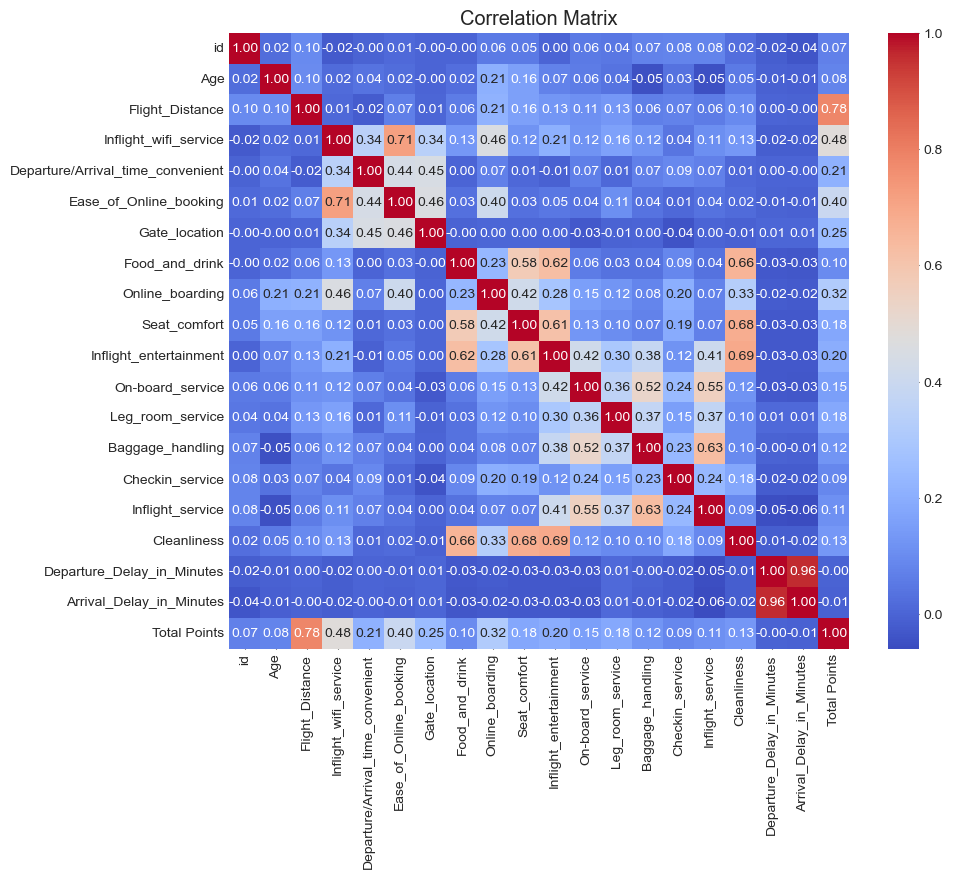

In [35]:
# Correlation Analysis
correlation_matrix = acs.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# <font color = "Black" size = 3> **Observation :** </font>

It can be observed that two customer rating features (Departure/Arrival time convenient and Gate location), play negligible part in customer satisfaction

These two features can be removed as they will add complexity for the model without adding any information

The rest of the customer ratings play a part in the in the overall customer satisfaction

<font color = "Brown" size = 5> **Data Preprocessing** </font>

**Checking for Outliers**

In [50]:
def check_outliers(dataframe):
    # Determining the upper and lower quartiles
    Quart1 = dataframe.quantile(0.25)
    Quart3 = dataframe.quantile(0.75)

    # Determining the interquartile range
    IQR = Quart3 - Quart1

    # Determining the upper and lower outlier thresholds to remove the outliers
    upper_outlier_threshold = Quart3 + 1.5 * IQR
    lower_outlier_threshold = Quart1 - 1.5 * IQR

    # Finding the number of outliers in each column
    outliers = ((dataframe > upper_outlier_threshold) | (dataframe < lower_outlier_threshold)).sum()
    percent_outliers = round((outliers * 100 / len(dataframe)), 4)

    # Create a DataFrame to store the outlier information
    outlier_acs = pd.DataFrame({'Number of Outliers': outliers,
                               'Percentage Outliers': percent_outliers})
    outlier_acs.index.name = 'Feature'

    return outlier_acs

# Example usage:
# outlier_info = check_outliers(your_dataframe)
# print(outlier_info)


In [51]:
check_outliers(acs) 

Number of Outliers  Percentage Outliers
Feature                                                            
Gender                                       0               0.0000
Customer_Type                            23780              18.3092
Age                                          0               0.0000
Type_of_Travel                               0               0.0000
Class                                        0               0.0000
Flight_Distance                           2855               2.1982
Inflight_wifi_service                        0               0.0000
Ease_of_Online_booking                       0               0.0000
Food_and_drink                               0               0.0000
Online_boarding                              0               0.0000
Seat_comfort                                 0               0.0000
Inflight_entertainment                       0               0.0000
On-board_service                             0               0.0000
Leg_room_service                             0               0.0000
Baggage_handling                             0               0.0000
Checkin_service                          16109              12.4030
Inflight_service                             0               0.0000
Cleanliness                                  0               0.0000
Departure_Delay_in_Minutes               18098              13.9344
Arrival_Delay_in_Minutes                 17492              13.4678
satisfaction                                 0               0.0000
Total Points                             10003               7.7017

# <font color = "Black" size = 3> **Observation :** </font>

It can be observed that four features have outliers associated with them namely, Arrival_Delay_in_Minutes, Checkin service, Departure Delay in Minutes, Flight_Distance
Yet it can also be observed that these outliers are entirely possible situations
There were very long flights
There were very long delays in departure and arrival, with a max of 1590 and 1572 minutes
Checkin services have 1 ratings which is also possible

Decisions:

It is advisable not to remove the outliers
There is a common belief in statistics that if outliers are not errors, they should not be removed as they might give important information about the data


<font color = "Brown" size = 5> **Removing Initial Insignificant Features** </font>

There are three feature  we have no significance in the dataset and are just identifiers of  ID, of customers, Gate location,Departure/Arrival time convenient.

These feature must first be removed  in the dataset for the model can create problems in predictions

In [17]:
acs = acs.drop(['id',"Gate_location", "Departure/Arrival_time_convenient"], axis=1)

In [18]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      129880 non-null  object 
 1   Customer_Type               129880 non-null  object 
 2   Age                         129880 non-null  int64  
 3   Type_of_Travel              129880 non-null  object 
 4   Class                       129880 non-null  object 
 5   Flight_Distance             129880 non-null  int64  
 6   Inflight_wifi_service       129880 non-null  int64  
 7   Ease_of_Online_booking      129880 non-null  int64  
 8   Food_and_drink              129880 non-null  int64  
 9   Online_boarding             129880 non-null  int64  
 10  Seat_comfort                129880 non-null  int64  
 11  Inflight_entertainment      129880 non-null  int64  
 12  On-board_service            129880 non-null  int64  
 13  Leg_room_servi

In [19]:
acs.Customer_Type.value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer_Type, dtype: int64

In [20]:
#Then Replace them Some Logical values

In [21]:
acs.Gender = acs.Gender.replace({'Male':1, 'Female':0}) # then Replace them Some Logical values
acs['Customer_Type'] = acs['Customer_Type'].replace({'Loyal Customer':1, 'disloyal Customer':0})
acs.Class = acs.Class.replace({'Eco Plus':1, 'Business':2, 'Eco':0})
acs['Type_of_Travel'] = acs['Type_of_Travel'].replace({'Personal Travel':0, 'Business travel':1})
acs.satisfaction = acs.satisfaction.replace({'dissatisfied':0, 'satisfied':1})

In [22]:
acs.satisfaction.unique()

array([0, 1], dtype=int64)

In [23]:
from sklearn.model_selection import train_test_split
train_acs,test_acs = train_test_split(acs, test_size =.25)

In [24]:
train_acs_x = train_acs.iloc[: ,  0:-1]# all x from test
train_acs_y = train_acs.iloc[: ,   -1]# only y

test_acs_x = test_acs.iloc[: ,   0:-1] # all x from test
test_acs_y = test_acs.iloc[: ,   -1] # only y

In [25]:
train_acs_x.shape

(97410, 20)

In [26]:
test_acs_y.shape

(32470,)

# <font color = "Brown" size = 8> **Logistic Regression** </font>

In [27]:
from sklearn.metrics import confusion_matrix ,accuracy_score, recall_score , precision_score ,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [28]:
logreg.fit(train_acs_x,train_acs_y)

LogisticRegression(class_weight='balanced')

In [29]:
pred_test  = logreg.predict(test_acs_x)

In [30]:
tab_test_acs = confusion_matrix(test_acs_y,pred_test)

In [31]:
tab_test_acs        = pd.DataFrame(tab_test_acs)
tab_test_acs.columns = ['satisfied','disatisfied']
tab_test_acs.index   = ['satisfied','disatisfied']
tab_test_acs

satisfied  disatisfied
satisfied        13560         4787
disatisfied       2615        11508

In [32]:
print(classification_report(test_acs_y,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79     18347
           1       0.71      0.81      0.76     14123

    accuracy                           0.77     32470
   macro avg       0.77      0.78      0.77     32470
weighted avg       0.78      0.77      0.77     32470



In [33]:
pred_train_logreg = logreg.predict(train_acs_x)

In [34]:
print("Classification report of Training Data")
print(classification_report(train_acs_y,pred_train_logreg))

Classification report of Training Data
              precision    recall  f1-score   support

           0       0.84      0.74      0.79     55105
           1       0.71      0.82      0.76     42305

    accuracy                           0.77     97410
   macro avg       0.77      0.78      0.77     97410
weighted avg       0.78      0.77      0.77     97410



# Plot ROC-AUC curve and see the results

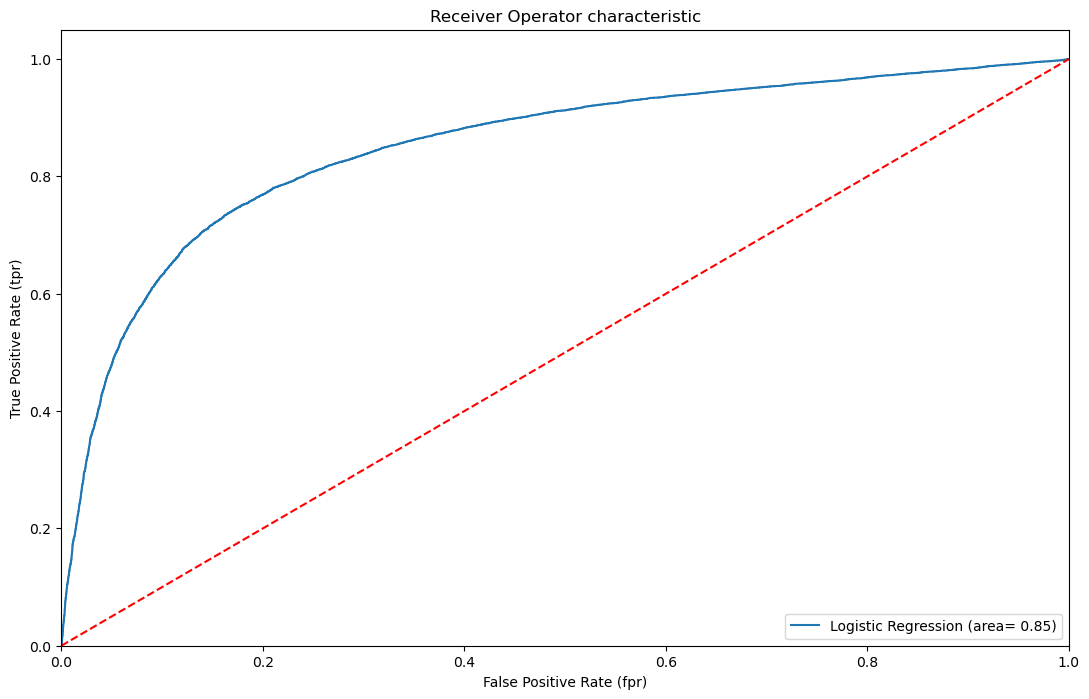

In [36]:
# Ensure you have test_acs_y (the true labels for the test set)
logit_roc_auc = roc_auc_score(test_acs_y, logreg.predict_proba(test_acs_x)[:, 1])
fpr, tpr, thresholds = roc_curve(test_acs_y, logreg.predict_proba(test_acs_x)[:, 1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Observation**

the logistic regression model performs well in classifying between positive and negative cases. This can be seen by the curve’s position in the upper left corner of the graph, closer to the ideal point (1, 1).
The area under the ROC curve (AUC) is 0.95, which is a good value. An AUC of 1 corresponds to a perfect classifier.

# <font color = "Brown" size = 8> **Decision Tree** </font>

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion =  'gini', max_depth= 9, min_samples_split = 27)

In [96]:
dt.fit(train_acs_x,train_acs_y)

DecisionTreeClassifier(max_depth=9, min_samples_split=27)

In [97]:
predict_test_dt    = dt.predict(test_acs_x)

In [98]:
tab_dt =confusion_matrix(test_acs_y,predict_test_dt)

In [99]:
tab_dt        = pd.DataFrame(tab_dt)
tab_dt.columns = ['satisfied','disatisfied']
tab_dt.index   = ['satisfied','disatisfied']
tab_dt

satisfied  disatisfied
satisfied        17764          641
disatisfied       1230        12835

In [100]:
print(classification_report(test_acs_y,predict_test_dt))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     18405
           1       0.95      0.91      0.93     14065

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [101]:
pred_train_dt = dt.predict(train_acs_x)

In [102]:
print("Classification report of Training Data")
print(classification_report(train_acs_y,pred_train_dt))

Classification report of Training Data
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     55047
           1       0.95      0.91      0.93     42363

    accuracy                           0.94     97410
   macro avg       0.94      0.94      0.94     97410
weighted avg       0.94      0.94      0.94     97410



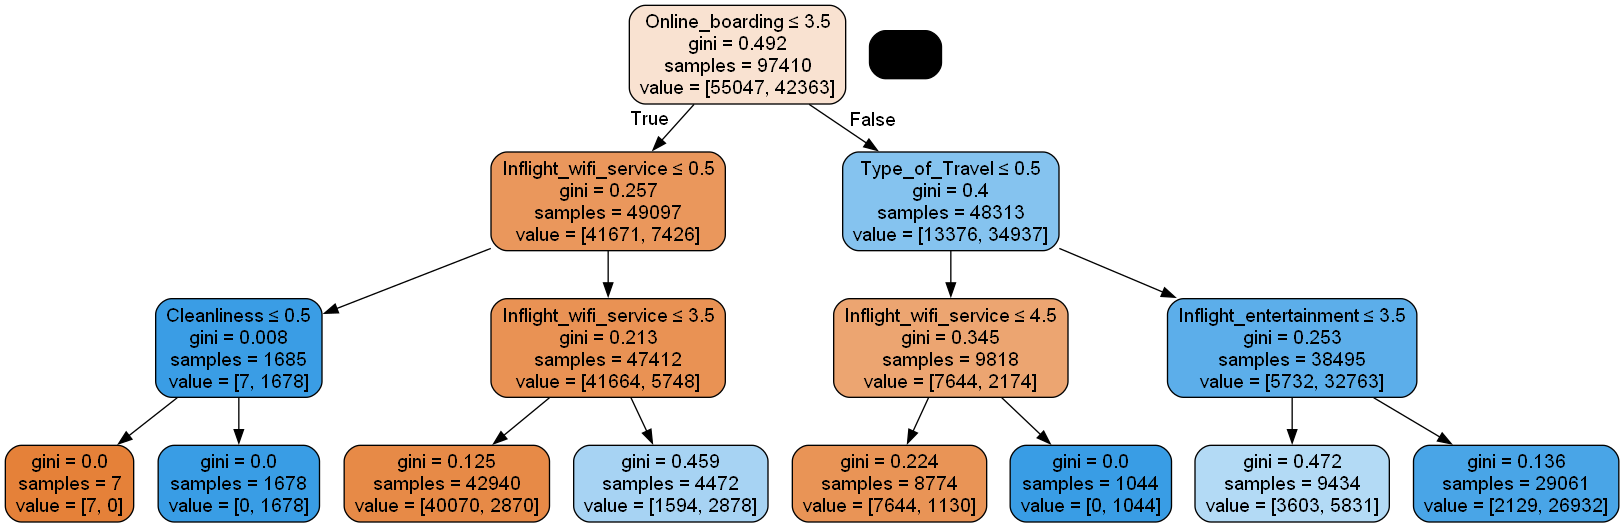

In [103]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Assuming 'train_acs_x' are your features and 'train_acs_y' are your target labels
# Initialize the DecisionTreeClassifier with max_depth
dt = DecisionTreeClassifier(max_depth=3)

# Train the model
dt.fit(train_acs_x, train_acs_y)

# Now you can visualize the decision tree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=train_acs_x.columns)

# Create the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph
Image(graph.create_png())


## Pre-Pruning

### IT WILL THAT BEST COMBINATION OF HYPER TUNNING IN DECISION TREE

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming 'train_acs_x' are your features and 'train_acs_y' are your target labels
# Make sure train_acs_x and train_acs_y are properly defined

# Split the data into training and testing sets
# Replace 'test_size' and 'random_state' with appropriate values
train_acs_x_train, train_acs_x_test, train_acs_y_train, train_acs_y_test = train_test_split(train_acs_x, train_acs_y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
search_dict = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(3, 10),  # Reduced range
    "min_samples_split": range(25, 50)  # Reduced range
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Create a grid search object with parallel processing
grid = GridSearchCV(dt, param_grid=search_dict, n_jobs=-1)

# Fit the grid search object on the training data
grid.fit(train_acs_x_train, train_acs_y_train)

# Print the best parameters found by the grid search
print("Best parameters:", grid.best_params_)


Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 44}


## <font color = "Brown" size = 8>**Random Forest**</font>

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy',min_samples_split=24)

In [106]:
rfc.fit(train_acs_x,train_acs_y)

RandomForestClassifier(criterion='entropy', min_samples_split=24)

In [107]:
pre_rfc  = rfc.predict(test_acs_x)

In [108]:
pre_rfc_acs = confusion_matrix(test_acs_y,pre_rfc)

In [109]:
tab_rf        = pd.DataFrame(pre_rfc_acs)
tab_rf.columns = ['satisfied','disatisfied']
tab_rf.index   = ['satisfied','disatisfied']
tab_rf

satisfied  disatisfied
satisfied        18026          379
disatisfied        862        13203

In [110]:
print(classification_report(test_acs_y,pre_rfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18405
           1       0.97      0.94      0.96     14065

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [111]:
pred_train = rfc.predict(train_acs_x)

In [112]:
print("Classification report of Training Data")
print(classification_report(train_acs_y,pred_train))

Classification report of Training Data
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     55047
           1       0.99      0.95      0.97     42363

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



<font color = "Red" size = 8> **Boosting Model** </font>

## <font color = "Brown" size = 5>**Ada Boost**</font>

In [113]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(rfc)

In [114]:
abc.fit(train_acs_x,train_acs_y)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    min_samples_split=24))

In [115]:
pred_abc = abc.predict(test_acs_x)

In [116]:
pre_abc_acs = confusion_matrix(test_acs_y,pred_abc)

In [117]:
tab_nb        = pd.DataFrame(pre_abc_acs)
tab_nb.columns = ['satisfied','disatisfied']
tab_nb.index   = ['satisfied','disatisfied']
tab_nb

satisfied  disatisfied
satisfied        18046          359
disatisfied        851        13214

In [118]:
print(classification_report(test_acs_y,pred_abc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18405
           1       0.97      0.94      0.96     14065

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [119]:
pred_train_abc = abc.predict(train_acs_x)

In [120]:
print("Classification report of Training Data")
print(classification_report(train_acs_y,pred_train_abc))

Classification report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55047
           1       1.00      1.00      1.00     42363

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410



 <font color = "Brown" size = 5> **Gradiant boost** </font>

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gd_estimator =GradientBoostingClassifier( min_samples_split=8, n_estimators=150,learning_rate=0.3)

In [122]:
gd_estimator.fit(train_acs_x,train_acs_y)

GradientBoostingClassifier(learning_rate=0.3, min_samples_split=8,
                           n_estimators=150)

In [123]:
pred_gd = gd_estimator.predict(test_acs_x)

In [124]:
pre_gd_estimator = confusion_matrix(test_acs_y,pred_gd)

In [125]:
tab_gb        = pd.DataFrame(pre_gd_estimator)
tab_gb.columns = ['satisfied','disatisfied']
tab_gb.index   = ['satisfied','disatisfied']
tab_gb

satisfied  disatisfied
satisfied        17891          514
disatisfied        879        13186

In [126]:
print(classification_report(test_acs_y,pred_gd))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     18405
           1       0.96      0.94      0.95     14065

    accuracy                           0.96     32470
   macro avg       0.96      0.95      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [127]:
pred_train_gd = gd_estimator.predict(train_acs_x)

In [128]:
print("Classification report of Training Data")
print(classification_report(train_acs_y,pred_train_gd))

Classification report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     55047
           1       0.97      0.94      0.95     42363

    accuracy                           0.96     97410
   macro avg       0.96      0.96      0.96     97410
weighted avg       0.96      0.96      0.96     97410



 <font color = "Brown" size = 5> **XG boost** </font>

In [129]:
from xgboost import XGBClassifier
xgb_estimator=XGBClassifier(random_state = 1)

In [130]:
from xgboost import XGBClassifier
xgb_estimator=XGBClassifier(random_state = 1)

In [131]:
xgb_estimator.fit(train_acs_x,train_acs_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [132]:
pred_xgb = xgb_estimator.predict(test_acs_x)

In [133]:
pre_xgb_estimator = confusion_matrix(test_acs_y,pred_xgb)

In [134]:
tab_xgb        = pd.DataFrame(pre_xgb_estimator)
tab_xgb.columns = ['satisfied','disatisfied']
tab_xgb.index   = ['satisfied','disatisfied']
tab_xgb

satisfied  disatisfied
satisfied        17993          412
disatisfied        829        13236

In [135]:
 print(classification_report(test_acs_y,pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18405
           1       0.97      0.94      0.96     14065

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [136]:
pred_train_xgb = xgb_estimator.predict(train_acs_x)

In [137]:
print("Classification report of Training Data")
print(classification_report(train_acs_y,pred_train_xgb))

Classification report of Training Data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     55047
           1       0.98      0.96      0.97     42363

    accuracy                           0.97     97410
   macro avg       0.98      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



## <font color = "Brown" size = 8>**feature importances**</font>                                          

In [325]:
train_acs_x.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service', 'Ease_of_Online_booking',
       'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

In [332]:
rfc.feature_importances_

array([0.00289537, 0.03952134, 0.02915205, 0.10351441, 0.10463767,
       0.02615112, 0.17432704, 0.04496002, 0.010068  , 0.18312532,
       0.0477127 , 0.04780409, 0.03023771, 0.03908512, 0.02609492,
       0.02328168, 0.02415981, 0.02564048, 0.00758919, 0.01004197])

In [333]:
fea_imp = pd.DataFrame()
fea_imp["feature"] = train_acs_x.columns
fea_imp["imp"] = rfc.feature_importances_
fea_imp = fea_imp.sort_values('imp', ascending=False)
fea_imp

feature       imp
9              Online_boarding  0.183125
6        Inflight_wifi_service  0.174327
4                        Class  0.104638
3               Type_of_Travel  0.103514
11      Inflight_entertainment  0.047804
10                Seat_comfort  0.047713
7       Ease_of_Online_booking  0.044960
1                Customer_Type  0.039521
13            Leg_room_service  0.039085
12            On-board_service  0.030238
2                          Age  0.029152
5              Flight_Distance  0.026151
14            Baggage_handling  0.026095
17                 Cleanliness  0.025640
16            Inflight_service  0.024160
15             Checkin_service  0.023282
8               Food_and_drink  0.010068
19    Arrival_Delay_in_Minutes  0.010042
18  Departure_Delay_in_Minutes  0.007589
0                       Gender  0.002895

# **Observation**

 The most important factor is the type of travel (business or personal), followed by the class (economy, business, or economy plus). The least important factors are age, gender, and arrival delay in minutes.

In [242]:
comparison_frame = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree ','Random Forest','AdaBoost', 'GradientBoost','XGBoost'],
                                 'Train_Acuuracy' : [77,94,97,1,96,97],'Test_accuracy' : [77,94,96,96,96,96],
                                 'Train_Recall': [77,94,97,1,96,97], 'Test_Recall': [77,94,96,96,96,96],
                                 'Train_Precision':[78,94,97,1,96,98],'Test_Precision':[78,94,96,96,96,96],
                                 'Train_F1_score':[77,94,97,1,96,97],'Test_F1_score':[77,94,96,96,96,96]})
comparison_frame

Model  Train_Acuuracy  Test_accuracy  Train_Recall  \
0  Logistic Regression              77             77            77   
1       Decision Tree               94             94            94   
2        Random Forest              97             96            97   
3             AdaBoost               1             96             1   
4        GradientBoost              96             96            96   
5              XGBoost              97             96            97   

   Test_Recall  Train_Precision  Test_Precision  Train_F1_score  Test_F1_score  
0           77               78              78              77             77  
1           94               94              94              94             94  
2           96               97              96              97             96  
3           96                1              96               1             96  
4           96               96              96              96             96  
5           96               98              96              97             96

# **observation**

Overall, based on the  information in this table, XGBoost appears to be a well-performing model for this task. It achieves high accuracy, precision, and recall on the test data, suggesting that it generalizes well and can be effective for making predictions.

Compared to other models in the table (Logistic Regression,Decision Tree ,Random Forest,AdaBoost, GradientBoost), XGBoost achieves the second-highest test accuracy and precision, and the third-highest test recall.

# **Conclusion:**

The Flight Satisfaction Prediction project aims to make air travel better for passengers by using data to understand what makes them happy during flights. Through analyzing various factors like age, travel preferences, and service ratings, the project uncovered insights to help airlines improve their services.

Key Takeaways:

1. **Understanding Passenger Needs**: By looking at data, we found out what aspects of flying matter most to passengers, such as comfort, entertainment, and online booking convenience.

2. **Predicting Satisfaction**: Using machine learning, we built models that can predict whether passengers will be happy with their flights. This helps airlines anticipate issues and make improvements before problems arise.

3. **Practical Recommendations**: Based on our findings, we suggest airlines focus on improving comfort, entertainment options, and online services to boost passenger satisfaction. Investing in technology and targeted marketing can also help build loyalty and keep customers coming back.

In short, by paying attention to what passengers want and using data-driven insights, airlines can create better experiences and keep customers happy in the sky.